In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RepeatedKFold,KFold,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier


In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
#Converting dependent variable categorical to dummy
y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
y=y.values.reshape(-1, 1)

In [3]:
data_c = data.iloc[: , 0:7]
data_c.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [4]:
# Label encoder order is alphabetical

labelencoder_X = LabelEncoder()
data_c['job']      = labelencoder_X.fit_transform(data_c['job']) 
data_c['marital']  = labelencoder_X.fit_transform(data_c['marital']) 
data_c['education']= labelencoder_X.fit_transform(data_c['education']) 
data_c['default']  = labelencoder_X.fit_transform(data_c['default']) 
data_c['housing']  = labelencoder_X.fit_transform(data_c['housing']) 
data_c['loan']     = labelencoder_X.fit_transform(data_c['loan']) 

In [5]:

data_c.loc[data_c['age'] <= 32, 'age'] = 1
data_c.loc[(data_c['age'] > 32) & (data_c['age'] <= 47), 'age'] = 2
data_c.loc[(data_c['age'] > 47) & (data_c['age'] <= 70), 'age'] = 3
data_c.loc[(data_c['age'] > 70) & (data_c['age'] <= 98), 'age'] = 4


In [6]:
data_r = data.iloc[: , 7:11]
data_r.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [7]:
data_r.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [8]:
data[(data['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [9]:
data_r['contact']     = labelencoder_X.fit_transform(data_r['contact']) 
data_r['month']       = labelencoder_X.fit_transform(data_r['month']) 
data_r['day_of_week'] = labelencoder_X.fit_transform(data_r['day_of_week']) 

In [10]:
data_r.loc[data['duration'] <= 102, 'duration'] = 1
data_r.loc[(data['duration'] > 102) & (data_r['duration'] <= 180)  , 'duration']    = 2
data_r.loc[(data['duration'] > 180) & (data_r['duration'] <= 319)  , 'duration']   = 3
data_r.loc[(data['duration'] > 319) & (data_r['duration'] <= 644.5), 'duration'] = 4
data_r.loc[data['duration']  > 644.5, 'duration'] = 5


In [11]:
data_s = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
data_s.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [12]:
data_o = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
data_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [13]:
data_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)


In [14]:
data_final= pd.concat([data_c, data_r, data_s, data_o], axis = 1)
data_final = data_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
data_final.shape

(41188, 20)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(data_final, y.ravel(), test_size = 0.2, random_state = 101)

In [16]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:

cv=RepeatedKFold(n_splits=5,n_repeats=5,random_state=True)

In [18]:
from sklearn.linear_model import LogisticRegression
all_scores=[]
for x in np.logspace(-4,4,20):
    model=LogisticRegression(C=x)
    model.fit(X_train,y_train)
    scores=cross_val_score(model, X_train, y_train.ravel(),scoring="roc_auc", cv=cv)
    all_scores.append(scores.mean())

Text(0.5, 1.0, 'Logistic Regression Model')

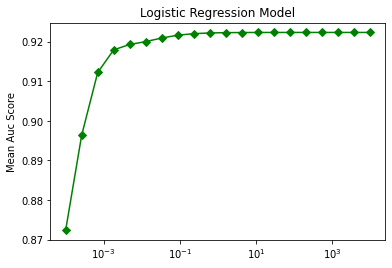

In [19]:

plt.plot(np.logspace(-4,4,20,endpoint=True),all_scores,'-gD')
plt.xscale("log")
plt.ylabel("Mean Auc Score")
plt.title("Logistic Regression Model")

In [20]:
param_grid = {
    'max_depth': [50,150,250],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3],
    'n_estimators': [10,50,100,250,500,1000]
}
cv=RepeatedKFold(n_splits=3,n_repeats=3,random_state=True)
rf = RandomForestRegressor()
grid_search_logi = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [21]:
grid_search_logi.fit(X_train,y_train.ravel())

Fitting 9 folds for each of 108 candidates, totalling 972 fits
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END max_depth=50, min_samples_le

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 150, 250],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]},
             verbose=2)

In [22]:
grid_search_logi.best_params_

{'max_depth': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [23]:
last_model_logi=RandomForestRegressor(**grid_search_logi.best_params_)

In [24]:
scores = cross_val_score(last_model_logi, X_train, y_train.ravel(),scoring="roc_auc", cv=cv)

In [25]:
scores.mean()

0.9371587195024931

In [26]:
from sklearn.neural_network import MLPClassifier

mlp_classifier=MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(10,10,10),(10,10,10,10),(10,10,10,10,10),(10,10,10,10,10,10)],
    'alpha': [0.00001, 0.0001,0.001, 0.01, 0.1],
}
grid_search = GridSearchCV(estimator = mlp_classifier, param_grid = parameter_space, 
                          cv = cv, n_jobs = -1, verbose = 2,scoring='roc_auc')

In [28]:
grid_search.fit(X_train,y_train.ravel())

Fitting 9 folds for each of 20 candidates, totalling 180 fits
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  15.1s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  15.6s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  18.9s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  20.4s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  20.7s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  23.2s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  24.2s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  25.9s
[CV] END .......alpha=1e-05, hidden_layer_sizes=(10, 10, 10); total time=  16.5s
[CV] END ...alpha=1e-05, hidden_layer_sizes=(10, 10, 10, 10); total time=  19.4s
[CV] END ...alpha=1e-05, hidden_layer_sizes=(10, 10, 10, 10); total time=  17.9s
[CV] END ...alpha=1e-05, hidden_layer_sizes=(10

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=True),
             estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10, 10, 10), (10, 10, 10, 10),
                                                (10, 10, 10, 10, 10),
                                                (10, 10, 10, 10, 10, 10)]},
             scoring='roc_auc', verbose=2)

In [80]:
# Variables for average classification report
from sklearn.metrics import classification_report,make_scorer,accuracy_score
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


logistic_reg=LogisticRegression(C=1)
best_neural=MLPClassifier(**grid_search.best_params_)
best_randomforest=RandomForestClassifier(n_estimators=500,max_depth=50,min_samples_leaf=3,min_samples_split=2)
# best_randomforest.fit(X_train,y_train.ravel())
# y_pred=best_randomforest.predict(X_test)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=True)
# Nested CV with parameter optimization
nested_score = cross_val_score(logistic_reg, X=X_train, y=y_train.ravel(), cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
print("classification report for logistic regression")
print(classification_report(originalclass, predictedclass)) 
originalclass.clear()
predictedclass.clear()
nested_score = cross_val_score(best_neural, X=X_train, y=y_train.ravel(), cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
print("classification report for neural regression")
print(classification_report(originalclass, predictedclass)) 


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29269
           1       0.67      0.38      0.49      3681

    accuracy                           0.91     32950
   macro avg       0.80      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950

classification report for neural regression
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29269
           1       0.62      0.51      0.56      3681

    accuracy                           0.91     32950
   macro avg       0.78      0.74      0.75     32950
weighted avg       0.90      0.91      0.91     32950

